# PART 2: Processing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dt
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier


from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [2]:
df = pd.read_csv('subreddits_post.csv')
df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,thumbnail_width,url_overridden_by_dest,media_metadata,distinguished,crosspost_parent,crosspost_parent_list,author_cakeday,suggested_sort,gallery_data,is_gallery
0,0,[],False,BengtJJ,NaN,[],NaN,text,t2_gkbsx,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,stuart210,NaN,[],NaN,text,t2_4zs1q074,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,aNteriorDude,NaN,[],NaN,text,t2_f1bvs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Mechgyrasaur,alliance-warrior,"[{'a': ':alliance:', 'e': 'emoji', 'u': 'https...",:alliance::warrior:,richtext,t2_y3x5f,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Bliztivision,NaN,[],NaN,text,t2_94xztkt5,False,...,140.0,https://www.youtube.com/watch?v=Al2oKBMF8to,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.tail()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,...,thumbnail_width,url_overridden_by_dest,media_metadata,distinguished,crosspost_parent,crosspost_parent_list,author_cakeday,suggested_sort,gallery_data,is_gallery
1395,95,[],False,twasRequired,NaN,[],NaN,text,t2_ek6nn9nh,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confidence,NaN,NaN
1396,96,[],False,apretorii,NaN,[],NaN,text,t2_2qsg2wym,False,...,140.0,https://i.redd.it/tae8ikoxx7f81.jpg,NaN,NaN,NaN,NaN,NaN,confidence,NaN,NaN
1397,97,[],False,rhoxt,NaN,[],NaN,text,t2_5p9041zk,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confidence,NaN,NaN
1398,98,[],False,RonDonk2020,NaN,[],NaN,text,t2_4701787l,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confidence,NaN,NaN
1399,99,[],False,mann_moth,NaN,[],NaN,text,t2_hj1eroz,False,...,140.0,https://www.reddit.com/gallery/shuuat,NaN,NaN,NaN,NaN,NaN,confidence,NaN,True


In [4]:
df.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media_only', 'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 

# Cleaning up Dataframe

In [5]:
df.isnull().sum().sort_values(ascending=False)

author_cakeday           1394
crosspost_parent_list    1393
gallery_data             1393
distinguished            1393
crosspost_parent         1393
                         ... 
link_flair_type             0
link_flair_text_color       0
link_flair_text             0
link_flair_richtext         0
permalink                   0
Length: 84, dtype: int64

In [6]:
df.drop_duplicates(subset='title', inplace=True)

In [7]:
#I care about the 'selftext' column bec that adds to a post
df['selftext'].fillna('', inplace= True)  #lets fill the nulls with empty

In [8]:
#fields that I care about and will look at
subfields = ['title', 'selftext', 'subreddit', 'created_utc', 'author', 'num_comments', 'score', 'is_self']
df = df[subfields]
df.head(3)

,title,selftext,subreddit,created_utc,author,num_comments,score,is_self
0,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True
1,Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True
2,"Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True


In [9]:
df['title_and_selftext'] = df['title'] + ' ' + df['selftext']   #I need to combine these two!

In [10]:
df = df[['title_and_selftext', 'title', 'selftext', 'subreddit', 'created_utc', 'author', 'num_comments', 'score', 'is_self']] #reordering the columns
df.head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self
0,Healer main 9.2 Returning player and I feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True
1,Finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True
2,"Sound issue, directional Hello!\n\nI just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True
3,Is dispelling CC in PVP uncommon knowledge? I ...,Is dispelling CC in PVP uncommon knowledge?,I play arena a lot wouldn't say I'm amazing (m...,wow,1644704385,Mechgyrasaur,0,1,True
4,NICE,NICE,,wow,1644704733,Bliztivision,1,1,False


### String Cleaning!

In [11]:
df['title_and_selftext'] = df['title_and_selftext'].str.lower()  #make everything lowercase

In [12]:
import nltk
import re

In [13]:
# https://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() #TOKENIZES string on whitespaces (space, newline, tab )
lemmatizer = nltk.stem.WordNetLemmatizer()  #Instantiating my lemmatizer

In [14]:
#make a function to break down my words in sentences to simpler words
def lemmatize_sentence(string):
    return " ".join([lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(string)])

In [15]:
df['filtered_title_selftext'] = df['title_and_selftext'].map(lemmatize_sentence)

In [16]:
df.head(3)

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed]
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ..."


In [17]:
df['filtered_title_selftext'] = df['filtered_title_selftext'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove hyperrlink. newlines
df.head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed]
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ..."
3,is dispelling cc in pvp uncommon knowledge? i ...,Is dispelling CC in PVP uncommon knowledge?,I play arena a lot wouldn't say I'm amazing (m...,wow,1644704385,Mechgyrasaur,0,1,True,is dispelling cc in pvp uncommon knowledge? i ...
4,nice,NICE,,wow,1644704733,Bliztivision,1,1,False,nice


In [18]:
df['filtered_title_selftext'] = df['filtered_title_selftext'].str.replace("&amp;#x200b","") #remove apostrophes and remove this html stuff: &amp;#x200b

In [19]:
df['filtered_title_selftext'] = df['filtered_title_selftext'].str.replace("'","")

In [20]:
df.loc[df['filtered_title_selftext'].str.contains('&amp;#x200b;',)].count()

title_and_selftext         0
title                      0
selftext                   0
subreddit                  0
created_utc                0
author                     0
num_comments               0
score                      0
is_self                    0
filtered_title_selftext    0
dtype: int64

In [21]:
df.loc[df['filtered_title_selftext'].str.contains("'",)].count()


title_and_selftext         0
title                      0
selftext                   0
subreddit                  0
created_utc                0
author                     0
num_comments               0
score                      0
is_self                    0
filtered_title_selftext    0
dtype: int64

In [22]:
df.loc[df['filtered_title_selftext'].str.contains("http")].count()

title_and_selftext         0
title                      0
selftext                   0
subreddit                  0
created_utc                0
author                     0
num_comments               0
score                      0
is_self                    0
filtered_title_selftext    0
dtype: int64

In [23]:
df['filtered_title_selftext'][800]

'meanwhile @ ag hq ; [tell u again how long that queue is!]('

In [24]:
# #going to replace x200b with ''
# #df['stringz'] =
# df['filtered_title_selftext'].str.replace("&amp;#x200b;", " ", regex=False)

In [25]:
df.shape

(1386, 10)

## EDA TIME

In [26]:
#going to separate my two subreddits for now
wow_posts = df[df['subreddit']=='wow']
lostark_posts = df[df['subreddit']=='lostarkgame']

In [27]:
wow_posts['title'] = wow_posts['title'].map(lemmatize_sentence)
lostark_posts['title'] = lostark_posts['title'].map(lemmatize_sentence)

C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/3877585703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wow_posts['title'] = wow_posts['title'].map(lemmatize_sentence)
C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/3877585703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lostark_posts['title'] = lostark_posts['title'].map(lemmatize_sentence)


In [28]:
wow_posts

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed]
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ..."
3,is dispelling cc in pvp uncommon knowledge? i ...,Is dispelling CC in PVP uncommon knowledge?,I play arena a lot wouldn't say I'm amazing (m...,wow,1644704385,Mechgyrasaur,0,1,True,is dispelling cc in pvp uncommon knowledge? i ...
4,nice,NICE,,wow,1644704733,Bliztivision,1,1,False,nice
...,...,...,...,...,...,...,...,...,...,...
695,it's so sad this game had to die for us to get...,It's so sad this game had to die for u to get ...,In super happy for everyone who still plays to...,wow,1643700410,Infinite-Campaign372,0,1,True,its so sad this game had to die for u to get t...
696,"if you quit wow, will you come back? i heard b...","If you quit WoW, will you come back?",I heard Blizzard made some good changes and wa...,wow,1643701205,RoastedWorm,7,1,True,"if you quit wow, will you come back? i heard b..."
697,for the success of the new cross faction gamep...,For the success of the new cross faction gamep...,One problem that might impact the future Cross...,wow,1643702133,lucas_volken,0,1,True,for the success of the new cross faction gamep...
698,i have some question i hope they will answer i...,I have some question i hope they will answer i...,"**How will it go with titles like ""Famed slaye...",wow,1643702210,W1shm4ster,0,1,True,i have some question i hope they will answer i...


In [29]:
lostark_posts

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext
700,can we please get a static main menu? my gpu i...,Can we please get a static main menu? My GPU i...,"not only does it cost more, it actually lowers...",lostarkgame,1644701447,_DOENER_MIT_ALLES_,0,1,True,can we please get a static main menu? my gpu i...
701,in case anyone wants to know what the luminous...,In case anyone want to know what the Luminous ...,So here's how Luminous Energy works - I will s...,lostarkgame,1644701449,2vDrew,0,1,True,in case anyone want to know what the luminous ...
702,i had bought gold founder but it says i don't ...,I had bought gold founder but it say I don't h...,I want to play with the benefits of it right n...,lostarkgame,1644701451,namrog84,0,1,True,i had bought gold founder but it say i dont ha...
703,they gave the cats buttholes.,They gave the cat buttholes.,,lostarkgame,1644701458,Archiive,0,1,False,they gave the cat buttholes.
704,lost ark refuses to launch game will not launc...,Lost ark refuse to launch,"Game will not launch, it’s stuck on the loadin...",lostarkgame,1644701460,Reddit_Ninja23,0,1,True,lost ark refuse to launch game will not launch...
...,...,...,...,...,...,...,...,...,...,...
1395,can you customize your characters appearance p...,Can you customize your character appearance po...,Lots of Korean games allow that if you have th...,lostarkgame,1643719754,twasRequired,0,1,True,can you customize your character appearance po...
1396,eu server popularity map,EU Server Popularity Map,,lostarkgame,1643720039,apretorii,0,1,False,eu server popularity map
1397,"question about revive feathers hi guys,\n\ni a...",Question about revive feather,"Hi Guys,\n\nI am just thinking about picking u...",lostarkgame,1643720592,rhoxt,0,1,True,"question about revive feather hi guys, i am ju..."
1398,pve endgame lower grind to endgame build / cas...,PvE Endgame Lower Grind to Endgame Build / Cas...,Hello - Seeing a lot of lists and info. \n\nIt...,lostarkgame,1643720838,RonDonk2020,0,1,True,pve endgame lower grind to endgame build / cas...


In [30]:
# lets get longest word counts of each subreddit posts from the title----------

wow_posts['title_word_count'] = wow_posts['title'].str.split().map(len)
lostark_posts['title_word_count'] = lostark_posts['title'].str.split().map(len)


C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/3374080593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wow_posts['title_word_count'] = wow_posts['title'].str.split().map(len)
C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/3374080593.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lostark_posts['title_word_count'] = lostark_posts['title'].str.split().map(len)


In [31]:
wow_posts.sort_values(by='title_word_count', ascending=False).head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,title_word_count
555,my husband just stopped playing wow after 10 y...,My husband just stopped playing WoW after 10 y...,,wow,1643878917,sweetpumpkinx,1,1,False,my husband just stopped playing wow after 10 y...,60
323,"how do i get 3840/3440x1440 on my 49"" 5120x144...","How do I get 3840/3440x1440 on my 49"" 5120x144...",,wow,1644197516,JenovasChild666,0,1,False,"how do i get 3840/3440x1440 on my 49"" 5120x144...",58
487,ok so now that alliance and horde are official...,ok so now that alliance and horde are official...,do you guys think this could happen and would ...,wow,1644070994,edelea,0,1,True,ok so now that alliance and horde are official...,54
85,i feel that it would be fun to tweak and add s...,I feel that it would be fun to tweak and add s...,,wow,1644764100,TheAceofHearth,0,1,False,i feel that it would be fun to tweak and add s...,52
274,since artifact appearances were allowed for tr...,Since artifact appearance were allowed for tra...,,wow,1644409807,ItsWednesdayMyCubes,8,1,False,since artifact appearance were allowed for tra...,51


In [32]:
lostark_posts.sort_values(by='title_word_count', ascending=False).head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,title_word_count
881,i gotthis achievement at item lvl 302... also ...,I gotthis achievement at item lvl 302... Also ...,,lostarkgame,1644534707,SpuRkZ_,0,1,False,i gotthis achievement at item lvl 302... also ...,52
1360,"not lostark. it was nicknamed ""seagull online""...","Not lostark. It wa nicknamed ""seagull online"" ...",,lostarkgame,1643697077,Novel_Cucumber_1588,0,1,False,"not lostark. it wa nicknamed ""seagull online"" ...",46
1216,wondering if cash shop prices will be equal li...,wondering if cash shop price will be equal lik...,[removed],lostarkgame,1643843783,srixonZball,1,1,True,wondering if cash shop price will be equal lik...,38
1369,"i am only bow mmo player, never played any oth...","I am only bow MMO player, never played any oth...",[removed],lostarkgame,1643702216,aradansk,1,1,True,"i am only bow mmo player, never played any oth...",35
1020,there are lots of posts/comments about avoidin...,There are lot of posts/comments about avoiding...,,lostarkgame,1644186874,Cawoi,0,1,False,there are lot of posts/comments about avoiding...,33


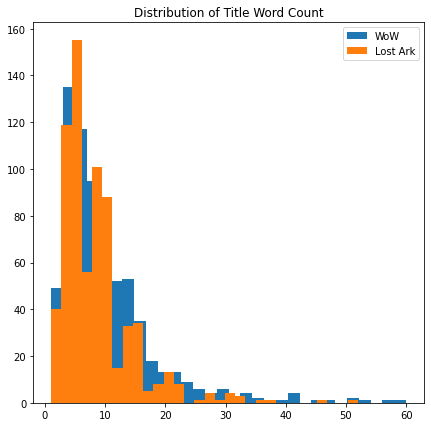

In [33]:
plt.figure(figsize=(7,7))
plt.hist(wow_posts['title_word_count'], bins = 30, label = 'WoW')
plt.hist(lostark_posts['title_word_count'], bins = 30, label = 'Lost Ark')
plt.title('Distribution of Title Word Count')
plt.legend(loc = 'upper right');

**The two MMO subreddits have a very similar distribution of 'title 'word counts around 10 words.**

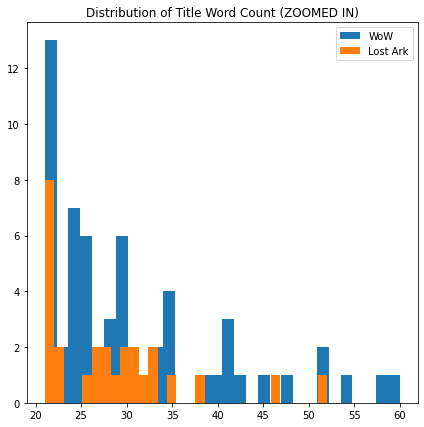

In [34]:
#look at the tail of the distribution!
plt.figure(figsize=(7,7))
plt.hist(wow_posts[wow_posts['title_word_count'] > 20]['title_word_count'], bins = 30, label = 'WoW')
plt.hist(lostark_posts[lostark_posts['title_word_count'] > 20]['title_word_count'], bins = 30, label = 'Lost Ark')
plt.title('Distribution of Title Word Count (ZOOMED IN)')
plt.legend(loc = 'upper right');

**Looking at the tail of the distribution, we can see that WoW takes over in the most 'title' word count.**

In [35]:
wow_posts['selftext'] = wow_posts['selftext'].map(lemmatize_sentence)
lostark_posts['selftext'] = lostark_posts['selftext'].map(lemmatize_sentence)

C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/3952016552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wow_posts['selftext'] = wow_posts['selftext'].map(lemmatize_sentence)
C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/3952016552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lostark_posts['selftext'] = lostark_posts['selftext'].map(lemmatize_sentence)


In [36]:
# lets get longest word counts of each subreddit posts from the selftext----------

wow_posts['selftext_count'] = wow_posts['selftext'].str.split().map(len)
lostark_posts['selftext_count'] = lostark_posts['selftext'].str.split().map(len)


C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/2388436016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wow_posts['selftext_count'] = wow_posts['selftext'].str.split().map(len)
C:\Users\mshuba\AppData\Local\Temp/ipykernel_31268/2388436016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lostark_posts['selftext_count'] = lostark_posts['selftext'].str.split().map(len)


In [37]:
wow_posts.sort_values(by='selftext_count', ascending=False).head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,title_word_count,selftext_count
577,windfury totem - a case for unique buffs pream...,Windfury Totem - A case for unique buff,Preamble: English is not my first language so ...,wow,1643897707,Tragorok,0,1,True,windfury totem - a case for unique buff preamb...,8,627
594,wows levelling experience caters far to much t...,WoWs levelling experience caters far to much t...,So let me clarify. Chromie Time (Timewalking L...,wow,1643905184,articanomaly,0,1,True,wow levelling experience caters far to much to...,26,589
259,auction house botting on many eu realms tldr:...,Auction House Botting on many EU Realms,TLDR: There seems to be a trend in auction hou...,wow,1644398811,theMkom,1,1,True,auction house botting on many eu realm tldr: t...,7,562
119,the issue of exclusively casual player progres...,The issue of exclusively casual player progres...,There is obviously an issue in today's game of...,wow,1644541925,ZeHobnobs,0,1,True,the issue of exclusively casual player progres...,7,548
698,i have some question i hope they will answer i...,I have some question i hope they will answer i...,"**How will it go with title like ""Famed slayer...",wow,1643702210,W1shm4ster,0,1,True,i have some question i hope they will answer i...,14,468


In [38]:
lostark_posts.sort_values(by='selftext_count', ascending=False).head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,title_word_count,selftext_count
1012,"is lost ark p2w? no, and here's why with all t...","Is Lost Ark P2W? No, and here's why",With all the talk of Lost Ark being P2W for th...,lostarkgame,1644185158,KaZe_DaRKWIND,2,1,True,"is lost ark p2w? no, and heres why with all th...",8,1552
1368,"as a new player, i wanted to share some resour...","As a new player, I wanted to share some resour...",#Resources: https://papunika.com/ https://lost...,lostarkgame,1643700605,koticgood,0,1,True,"a a new player, i wanted to share some resourc...",23,761
1100,i just find it funny that support classes bein...,I just find it funny that support class being ...,"So, i'm a KR player, and frequent both this su...",lostarkgame,1644010850,Voidwing,0,1,True,i just find it funny that support class being ...,18,626
1305,how knowledge transfer works - get your alts r...,How Knowledge Transfer work - Get your alt rea...,Please note that all the info in this post is ...,lostarkgame,1643666735,Ghostray_325,0,1,True,how knowledge transfer work - get your alt rea...,10,612
1067,mmo mouse configuration in lost ark i love mmo...,MMO Mouse Configuration in Lost Ark,I love MMO mouse for gaming. And so far Lost A...,lostarkgame,1644195536,my_shoes_hurt,0,1,True,mmo mouse configuration in lost ark i love mmo...,6,591


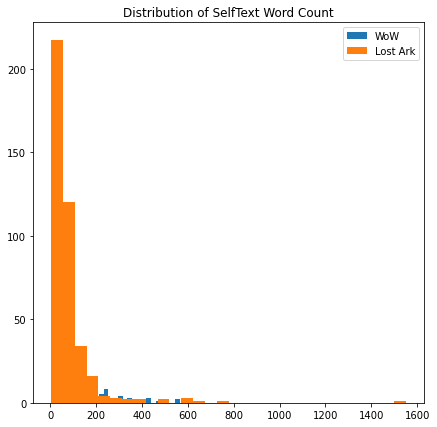

In [39]:
plt.figure(figsize=(7,7))
plt.hist(wow_posts[wow_posts['selftext_count'] > 2]['selftext_count'], bins = 30, label = 'WoW')
plt.hist(lostark_posts[lostark_posts['selftext_count'] > 2]['selftext_count'], bins = 30, label = 'Lost Ark')
plt.title('Distribution of SelfText Word Count')
plt.legend(loc = 'upper right');

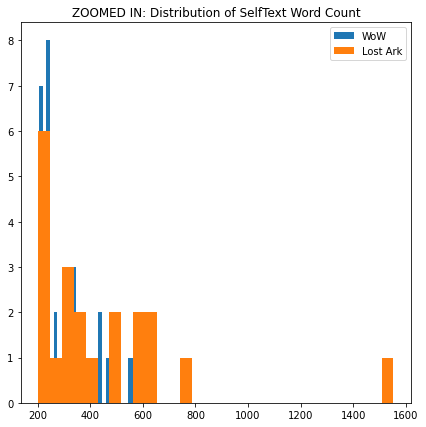

In [40]:
plt.figure(figsize=(7,7))
plt.hist(wow_posts[wow_posts['selftext_count'] > 200]['selftext_count'], bins = 30, label = 'WoW')
plt.hist(lostark_posts[lostark_posts['selftext_count'] > 200]['selftext_count'], bins = 30, label = 'Lost Ark')
plt.title('ZOOMED IN: Distribution of SelfText Word Count')
plt.legend(loc = 'upper right');

In [41]:
lostark_posts

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,title_word_count,selftext_count
700,can we please get a static main menu? my gpu i...,Can we please get a static main menu? My GPU i...,"not only doe it cost more, it actually lower m...",lostarkgame,1644701447,_DOENER_MIT_ALLES_,0,1,True,can we please get a static main menu? my gpu i...,21,22
701,in case anyone wants to know what the luminous...,In case anyone want to know what the Luminous ...,So here's how Luminous Energy work - I will sa...,lostarkgame,1644701449,2vDrew,0,1,True,in case anyone want to know what the luminous ...,20,88
702,i had bought gold founder but it says i don't ...,I had bought gold founder but it say I don't h...,I want to play with the benefit of it right no...,lostarkgame,1644701451,namrog84,0,1,True,i had bought gold founder but it say i dont ha...,16,84
703,they gave the cats buttholes.,They gave the cat buttholes.,,lostarkgame,1644701458,Archiive,0,1,False,they gave the cat buttholes.,5,0
704,lost ark refuses to launch game will not launc...,Lost ark refuse to launch,"Game will not launch, it’s stuck on the loadin...",lostarkgame,1644701460,Reddit_Ninja23,0,1,True,lost ark refuse to launch game will not launch...,5,47
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,can you customize your characters appearance p...,Can you customize your character appearance po...,Lots of Korean game allow that if you have the...,lostarkgame,1643719754,twasRequired,0,1,True,can you customize your character appearance po...,7,17
1396,eu server popularity map,EU Server Popularity Map,,lostarkgame,1643720039,apretorii,0,1,False,eu server popularity map,4,0
1397,"question about revive feathers hi guys,\n\ni a...",Question about revive feather,"Hi Guys, I am just thinking about picking up t...",lostarkgame,1643720592,rhoxt,0,1,True,"question about revive feather hi guys, i am ju...",4,61
1398,pve endgame lower grind to endgame build / cas...,PvE Endgame Lower Grind to Endgame Build / Cas...,Hello - Seeing a lot of list and info. It look...,lostarkgame,1643720838,RonDonk2020,0,1,True,pve endgame lower grind to endgame build / cas...,10,60


## EDA on Words?

In [42]:
df.head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed]
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ..."
3,is dispelling cc in pvp uncommon knowledge? i ...,Is dispelling CC in PVP uncommon knowledge?,I play arena a lot wouldn't say I'm amazing (m...,wow,1644704385,Mechgyrasaur,0,1,True,is dispelling cc in pvp uncommon knowledge? i ...
4,nice,NICE,,wow,1644704733,Bliztivision,1,1,False,nice


In [43]:
# need to make my 'subreddit' column into 1s or 0s to make  my classifcation!
# 'wow' == 1
# 'lostarkgame' == 0

In [44]:
df['subreddit_class'] = [1 if sub == 'wow' else 0 for sub in df['subreddit']]

In [45]:
X = df['filtered_title_selftext']
y = df['subreddit_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [46]:
X

0       healer main 9.2 returning player and i feel li...
1                     finding a gaming partner? [removed]
2       sound issue, directional hello! i just bought ...
3       is dispelling cc in pvp uncommon knowledge? i ...
4                                                    nice
                              ...                        
1395    can you customize your character appearance po...
1396                             eu server popularity map
1397    question about revive feather hi guys, i am ju...
1398    pve endgame lower grind to endgame build / cas...
1399                                                  him
Name: filtered_title_selftext, Length: 1386, dtype: object

In [47]:
#Instantiate Countvectorizer 
#we need to transform our strings into rows and columns of 0s and 1s
cvec = CountVectorizer(stop_words='english')
  #include the argument stop_words so we dont have to include words that little to no significance  for our analysis

In [48]:
#fit the vectorizer onto our corpus
cvec.fit(X_train) 

CountVectorizer(stop_words='english')

In [49]:
#transform the corpus
X_train = cvec.transform(X_train)

#transform the test
X_test = cvec.transform(X_test)
#in the fit it LEARNS the data.. dont want to learn against UNSEEN data!
#you dont fit on X_Test bec you will get data leakage...

In [50]:
X_train.todense()  #denser representation of our sparse matrix!

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [51]:
#Convert X_train to a dataframe

X_train_df = pd.DataFrame(X_train.todense(), columns=cvec.get_feature_names_out())

X_train_df.head()

,000,000g,01,02,03,08,0behgedjomh81,10,100,1000,...,zio,zone,zones,zovaal,ztroll,zuljin,дринта,금강선,버서커,잼민
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train_df['subreddit_class'] = y_train.values

In [53]:
X_train_df.head()

,000,000g,01,02,03,08,0behgedjomh81,10,100,1000,...,zone,zones,zovaal,ztroll,zuljin,дринта,금강선,버서커,잼민,subreddit_class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


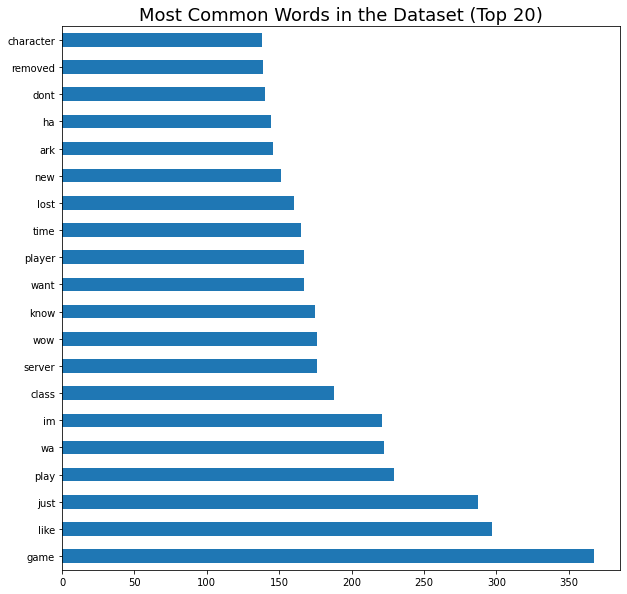

In [54]:
plt.figure(figsize=(10,10))
X_train_df.drop(columns='subreddit_class').sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('Most Common Words in the Dataset (Top 20)', size= 18);

In [55]:
#I want to capture the index of the top 20 columns of the words that appear the most.. I want to later cross reference them in the subreddits individually
#I want to also make a top 20 list taking these words for the suibreddit individually
top_20_overall = X_train_df.drop(columns='subreddit_class').sum().sort_values(ascending=False).index[:20].to_list()

In [56]:
top_20_overall

['game',
 'like',
 'just',
 'play',
 'wa',
 'im',
 'class',
 'server',
 'wow',
 'know',
 'want',
 'player',
 'time',
 'lost',
 'new',
 'ark',
 'ha',
 'dont',
 'removed',
 'character']

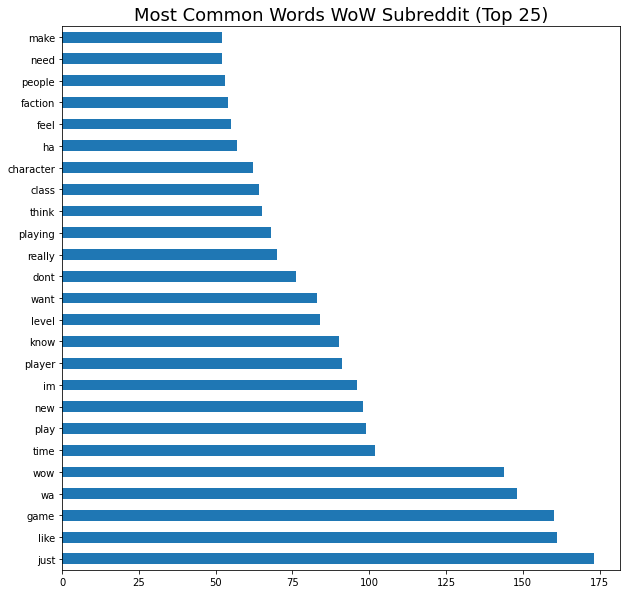

In [57]:
plt.figure(figsize=(10,10))
X_wow = X_train_df[X_train_df['subreddit_class'] == 1]
X_wow.drop(columns='subreddit_class').sum().sort_values(ascending=False)[:25].plot(kind='barh')
plt.title('Most Common Words WoW Subreddit (Top 25)', size= 18);

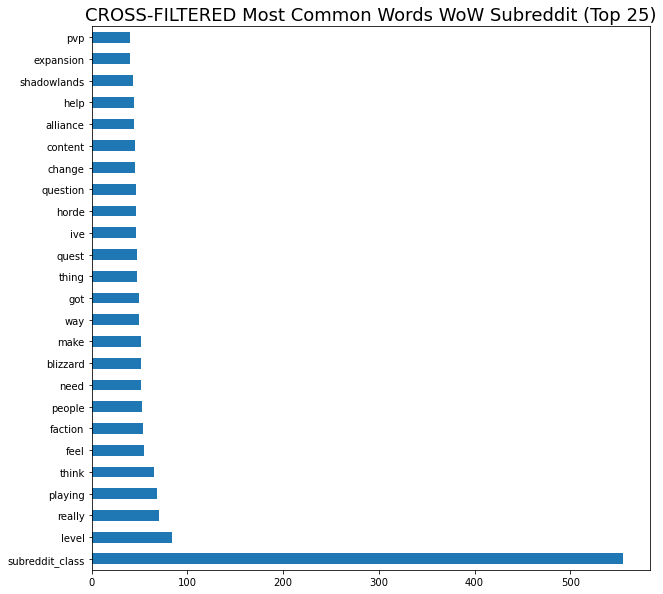

In [58]:
#Cross filtering the top 20 from overall!
X_wow = X_train_df[X_train_df['subreddit_class'] == 1]

plt.figure(figsize=(10,10))
X_wow.drop(columns=top_20_overall).sum().sort_values(ascending=False)[:25].plot(kind='barh')
plt.title('CROSS-FILTERED Most Common Words WoW Subreddit (Top 25)', size= 18);

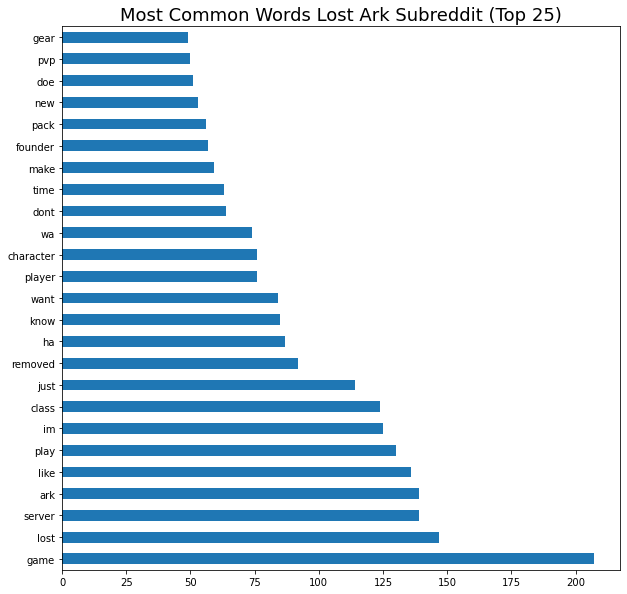

In [59]:
X_ark = X_train_df[X_train_df['subreddit_class'] == 0]
plt.figure(figsize=(10,10))
X_ark.drop(columns='subreddit_class').sum().sort_values(ascending=False)[:25].plot(kind='barh')
plt.title('Most Common Words Lost Ark Subreddit (Top 25)', size= 18);

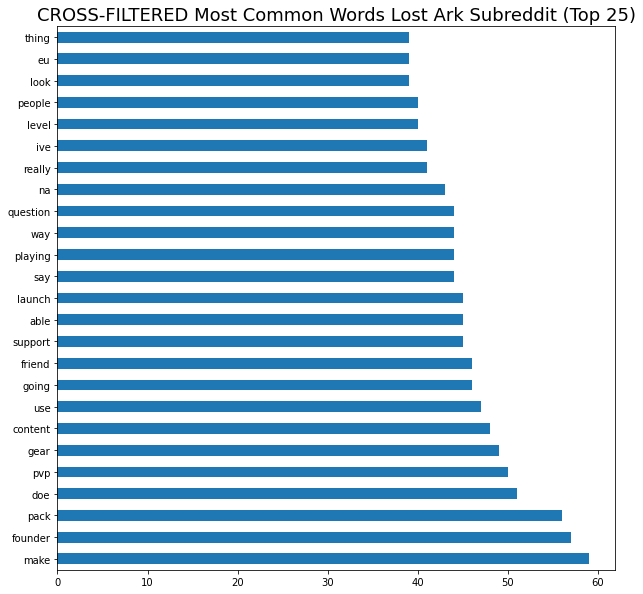

In [60]:
X_ark = X_train_df[X_train_df['subreddit_class'] == 0]

plt.figure(figsize=(10,10))
X_ark.drop(columns=top_20_overall).sum().sort_values(ascending=False)[:25].plot(kind='barh')
plt.title('CROSS-FILTERED Most Common Words Lost Ark Subreddit (Top 25)', size= 18);

### Common Bigrams

In [61]:
cvec2 = CountVectorizer(stop_words='english', ngram_range=(2,2))

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

#fit the vectorizer of our corpus
cvec2.fit(X_train2)
#transform it:
X_train2 = cvec2.transform(X_train2)

#transform test set
X_test2 = cvec2.transform(X_test2)

In [62]:
X_train_df2 = pd.DataFrame(X_train2.todense(), columns=cvec2.get_feature_names_out())

X_train_df2.head()

,000 different,000 item,000g transfer,01 accumulate,02 08,03 01,08 03,08 chance,10 10,10 15,...,zone zone,zones appropriate,zones hi,zones outlands,zovaal sylvanas,ztroll share,zuljin joined,금강선 chosen,버서커 share,잼민 버서커
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X_train_df2['subreddit_class'] = y_train2.values

In [64]:
X_train_df2.sum().sort_values(ascending=False)[:15]

subreddit_class    555
lost ark           144
founder pack        35
new player          31
feel like           30
cross faction       30
dont know           28
play game           22
dont want           22
want play           22
im sure             19
look like           17
just wondering      16
able play           16
world warcraft      15
dtype: int64

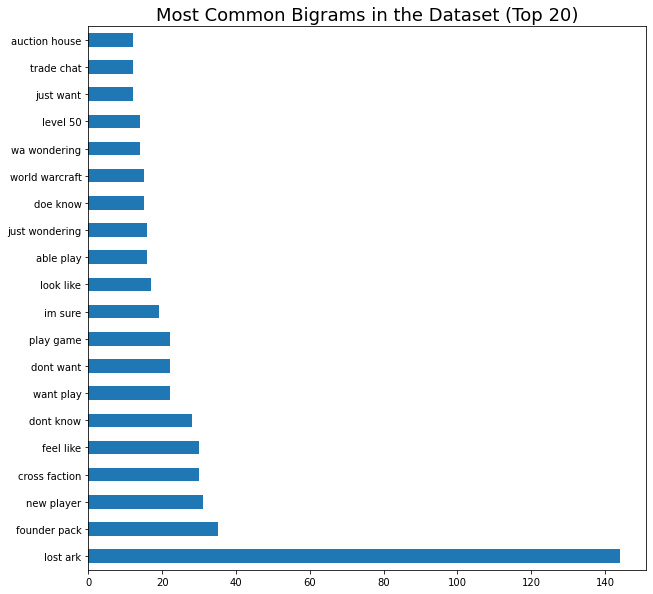

In [65]:
plt.figure(figsize=(10,10))
X_train_df2.drop(columns='subreddit_class').sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('Most Common Bigrams in the Dataset (Top 20)', size= 18);

In [66]:
#I want to capture the index of the top 20 columns of the words that appear the most.. I want to later cross reference them in the subreddits individually
#I want to also make a top 20 list taking these words for the suibreddit individually
top_20_bigram = X_train_df2.drop(columns='subreddit_class').sum().sort_values(ascending=False).index[:20].to_list()

In [67]:
top_20_bigram

['lost ark',
 'founder pack',
 'new player',
 'cross faction',
 'feel like',
 'dont know',
 'want play',
 'dont want',
 'play game',
 'im sure',
 'look like',
 'able play',
 'just wondering',
 'doe know',
 'world warcraft',
 'wa wondering',
 'level 50',
 'just want',
 'trade chat',
 'auction house']

In [68]:
top_20_bigram.append('subreddit_class')  #add this so we dont see it.. its just our classification label

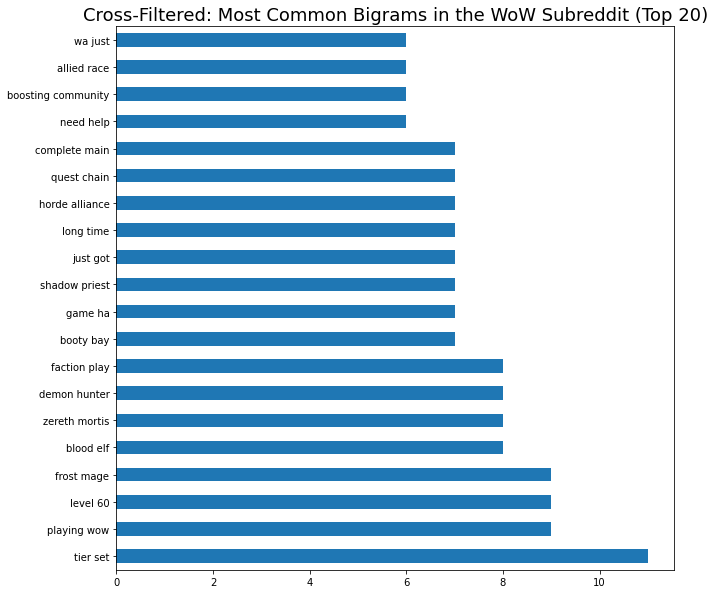

In [69]:
#top bigrams of wow subreddit

plt.figure(figsize=(10,10))
X_train_df2.loc[X_train_df2['subreddit_class'] == 1,].drop(columns=top_20_bigram).sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('Cross-Filtered: Most Common Bigrams in the WoW Subreddit (Top 20)', size= 18);

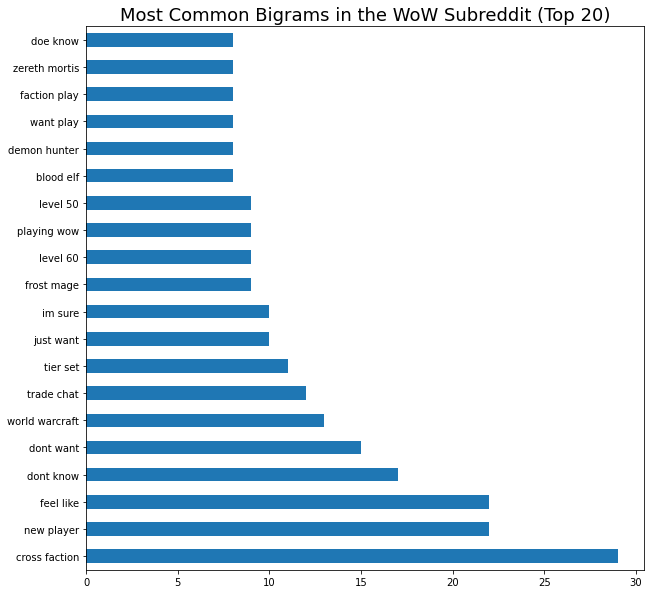

In [70]:
plt.figure(figsize=(10,10))
X_train_df2.loc[X_train_df2['subreddit_class'] == 1,].drop(columns='subreddit_class').sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('Most Common Bigrams in the WoW Subreddit (Top 20)', size= 18);

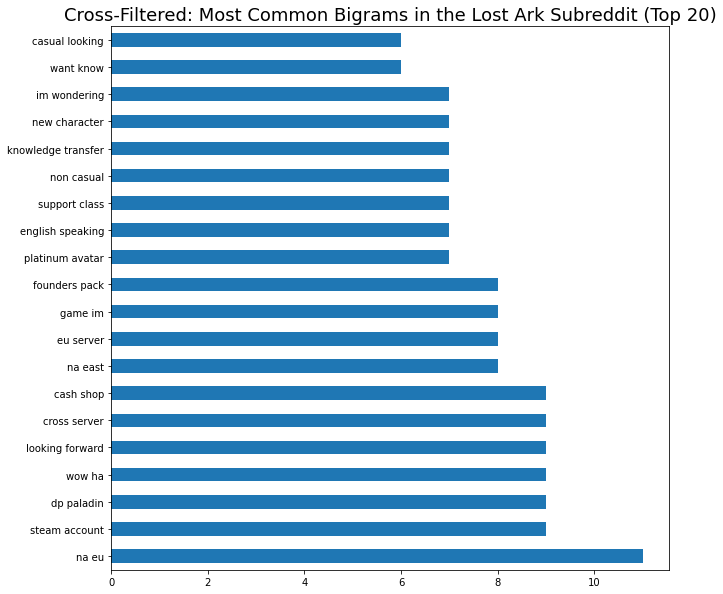

In [71]:
#top bigrams of lostarrk subreddit

plt.figure(figsize=(10,10))
X_train_df2.loc[X_train_df2['subreddit_class'] == 0,].drop(columns=top_20_bigram).sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('Cross-Filtered: Most Common Bigrams in the Lost Ark Subreddit (Top 20)', size= 18);


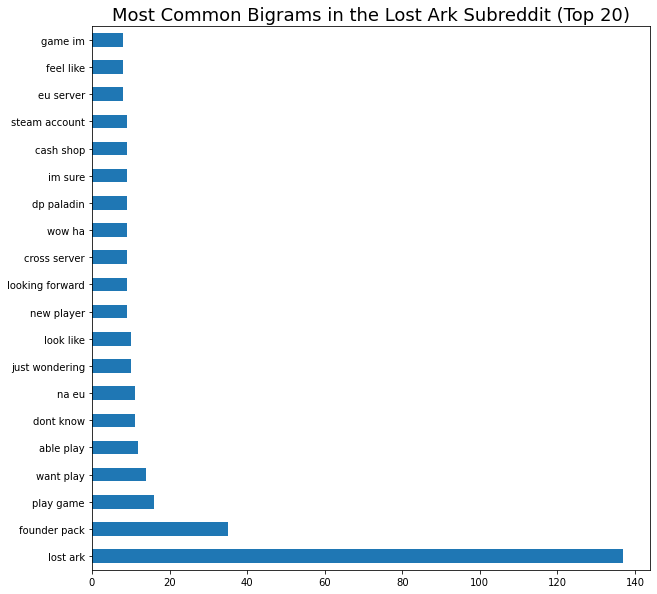

In [72]:
plt.figure(figsize=(10,10))
X_train_df2.loc[X_train_df2['subreddit_class'] == 0,].drop(columns='subreddit_class').sum().sort_values(ascending=False)[:20].plot(kind='barh')
plt.title('Most Common Bigrams in the Lost Ark Subreddit (Top 20)', size= 18);


## Sentiment Analysis: Machine can learn feelings?

In [73]:
df

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,subreddit_class
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...,1
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed],1
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ...",1
3,is dispelling cc in pvp uncommon knowledge? i ...,Is dispelling CC in PVP uncommon knowledge?,I play arena a lot wouldn't say I'm amazing (m...,wow,1644704385,Mechgyrasaur,0,1,True,is dispelling cc in pvp uncommon knowledge? i ...,1
4,nice,NICE,,wow,1644704733,Bliztivision,1,1,False,nice,1
...,...,...,...,...,...,...,...,...,...,...,...
1395,can you customize your characters appearance p...,Can you customize your characters appearance p...,Lots of Korean games allow that if you have th...,lostarkgame,1643719754,twasRequired,0,1,True,can you customize your character appearance po...,0
1396,eu server popularity map,EU Server Popularity Map,,lostarkgame,1643720039,apretorii,0,1,False,eu server popularity map,0
1397,"question about revive feathers hi guys,\n\ni a...",Question about revive feathers,"Hi Guys,\n\nI am just thinking about picking u...",lostarkgame,1643720592,rhoxt,0,1,True,"question about revive feather hi guys, i am ju...",0
1398,pve endgame lower grind to endgame build / cas...,PvE Endgame Lower Grind to Endgame Build / Cas...,Hello - Seeing a lot of lists and info. \n\nIt...,lostarkgame,1643720838,RonDonk2020,0,1,True,pve endgame lower grind to endgame build / cas...,0


In [74]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

In [75]:
sent.polarity_scores(df['filtered_title_selftext'][1])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [76]:
# from vaderSentiment Github how the scoring works (https://github.com/cjhutto/vaderSentiment)
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05


In [77]:
#get a column of my sentiment results
df['sentiment'] = df['filtered_title_selftext'].map(sent.polarity_scores)

In [78]:
df.head(3)

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,subreddit_class,sentiment
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...,1,"{'neg': 0.028, 'neu': 0.733, 'pos': 0.239, 'co..."
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed],1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ...",1,"{'neg': 0.107, 'neu': 0.786, 'pos': 0.107, 'co..."


In [79]:
df['sentiment']

0       {'neg': 0.028, 'neu': 0.733, 'pos': 0.239, 'co...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.107, 'neu': 0.786, 'pos': 0.107, 'co...
3       {'neg': 0.104, 'neu': 0.773, 'pos': 0.124, 'co...
4       {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
                              ...                        
1395    {'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'comp...
1396    {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...
1397    {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...
1398    {'neg': 0.079, 'neu': 0.655, 'pos': 0.265, 'co...
1399    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment, Length: 1386, dtype: object

In [80]:
df['sentiment'][0]['compound']

0.9549

In [81]:
[x['compound'] for x in df['sentiment'][:4]]

[0.9549, 0.0, -0.0752, 0.2696]

In [82]:
#lets get the overall results 'compound' into a separate column
df['sentiment_compound'] = [ compound['compound'] for compound in df['sentiment'] ]

In [83]:
df.head(3)

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,subreddit_class,sentiment,sentiment_compound
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...,1,"{'neg': 0.028, 'neu': 0.733, 'pos': 0.239, 'co...",0.9549
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed],1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ...",1,"{'neg': 0.107, 'neu': 0.786, 'pos': 0.107, 'co...",-0.0752


In [84]:
#going to make a column to return the type of sentiment the text was.. was it a positive, negative or neutral based on the score
def type_sentiment(score):
    if (score > -0.05) & (score < 0.05):
        return 'neutral'
    elif score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'

In [85]:
df['sentiment_class'] = df['sentiment_compound'].map(type_sentiment)

In [86]:
df.sort_values(by='sentiment_compound', ascending=False).head()

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,subreddit_class,sentiment,sentiment_compound,sentiment_class
1012,"is lost ark p2w? no, and here's why with all t...","Is Lost Ark P2W? No, and here's why",With all the talk of Lost Ark being P2W for th...,lostarkgame,1644185158,KaZe_DaRKWIND,2,1,True,"is lost ark p2w? no, and heres why with all th...",0,"{'neg': 0.082, 'neu': 0.7, 'pos': 0.218, 'comp...",0.9997,positive
836,honest review after 20 hours from someone who ...,Honest review after 20 hours from someone who ...,I had never played an MMO before but decided t...,lostarkgame,1644531942,Glenuig,0,1,True,honest review after 20 hour from someone who h...,0,"{'neg': 0.065, 'neu': 0.707, 'pos': 0.227, 'co...",0.9990,positive
1067,mmo mouse configuration in lost ark i love mmo...,MMO Mouse Configuration in Lost Ark,I love MMO mouses for gaming. And so far Lost ...,lostarkgame,1644195536,my_shoes_hurt,0,1,True,mmo mouse configuration in lost ark i love mmo...,0,"{'neg': 0.024, 'neu': 0.822, 'pos': 0.154, 'co...",0.9978,positive
197,prioritise race or faction? hey!\n\n**if you d...,Prioritise race or faction?,Hey!\n\n**If you don't want to read it all the...,wow,1644597209,WILLZZON,0,1,True,prioritise race or faction? hey! **if you dont...,1,"{'neg': 0.032, 'neu': 0.708, 'pos': 0.26, 'com...",0.9975,positive
649,"what a january! microsoft, ""leaks"", cross fact...","What a January! Microsoft, ""leaks"", cross fact...","January has come to an end, and concerning WoW...",wow,1643679426,cruffade,0,1,True,"what a january! microsoft, ""leaks"", cross fact...",1,"{'neg': 0.047, 'neu': 0.746, 'pos': 0.207, 'co...",0.9971,positive


In [87]:
#'boosting'
list_of_imp_words = ['wow', 'boosting']

In [88]:
boost = df.loc[df['filtered_title_selftext'].str.contains('boosting'), :]

In [89]:
print(boost['sentiment_class'].value_counts())

positive    17
negative     5
Name: sentiment_class, dtype: int64


In [90]:
boost['sentiment_class'].value_counts().index[1]

'negative'

In [91]:
df

,title_and_selftext,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,filtered_title_selftext,subreddit_class,sentiment,sentiment_compound,sentiment_class
0,healer main 9.2 returning player and i feel li...,Healer main 9.2,Returning player and I feel like it is quite o...,wow,1644701779,BengtJJ,0,1,True,healer main 9.2 returning player and i feel li...,1,"{'neg': 0.028, 'neu': 0.733, 'pos': 0.239, 'co...",0.9549,positive
1,finding a gaming partner? [removed],Finding a gaming partner?,[removed],wow,1644703269,stuart210,0,1,True,finding a gaming partner? [removed],1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,"sound issue, directional hello!\n\ni just boug...","Sound issue, directional",Hello!\n\nI just bought a new PC and for some ...,wow,1644704336,aNteriorDude,0,1,True,"sound issue, directional hello! i just bought ...",1,"{'neg': 0.107, 'neu': 0.786, 'pos': 0.107, 'co...",-0.0752,negative
3,is dispelling cc in pvp uncommon knowledge? i ...,Is dispelling CC in PVP uncommon knowledge?,I play arena a lot wouldn't say I'm amazing (m...,wow,1644704385,Mechgyrasaur,0,1,True,is dispelling cc in pvp uncommon knowledge? i ...,1,"{'neg': 0.104, 'neu': 0.773, 'pos': 0.124, 'co...",0.2696,positive
4,nice,NICE,,wow,1644704733,Bliztivision,1,1,False,nice,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4215,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,can you customize your characters appearance p...,Can you customize your characters appearance p...,Lots of Korean games allow that if you have th...,lostarkgame,1643719754,twasRequired,0,1,True,can you customize your character appearance po...,0,"{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'comp...",0.3094,positive
1396,eu server popularity map,EU Server Popularity Map,,lostarkgame,1643720039,apretorii,0,1,False,eu server popularity map,0,"{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...",0.4767,positive
1397,"question about revive feathers hi guys,\n\ni a...",Question about revive feathers,"Hi Guys,\n\nI am just thinking about picking u...",lostarkgame,1643720592,rhoxt,0,1,True,"question about revive feather hi guys, i am ju...",0,"{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.7650,positive
1398,pve endgame lower grind to endgame build / cas...,PvE Endgame Lower Grind to Endgame Build / Cas...,Hello - Seeing a lot of lists and info. \n\nIt...,lostarkgame,1643720838,RonDonk2020,0,1,True,pve endgame lower grind to endgame build / cas...,0,"{'neg': 0.079, 'neu': 0.655, 'pos': 0.265, 'co...",0.9294,positive


In [92]:
df['sentiment_class'].value_counts()

positive    798
neutral     310
negative    278
Name: sentiment_class, dtype: int64

In [93]:
positive_wow_posts = df.loc[df['subreddit_class'] == 1,['filtered_title_selftext', 'sentiment_compound']].sort_values(by='sentiment_compound', ascending=False)
positive_wow_posts

,filtered_title_selftext,sentiment_compound
197,prioritise race or faction? hey! **if you dont...,0.9975
649,"what a january! microsoft, ""leaks"", cross fact...",0.9971
542,alternative to wow for a relatively new mmorpg...,0.9956
119,the issue of exclusively casual player progres...,0.9952
324,help a noob out! hello all! i am approaching l...,0.9948
...,...,...
151,9.2 fake patch note made by me mage- mages can...,-0.9806
282,unlocking allied race im bored and i see lot o...,-0.9841
35,why do i keep losing threat? hello. i am playi...,-0.9887
44,class with this kind of skill i remember some ...,-0.9889


In [94]:
#looking at the top 3 positvely scored post from the wow subreddit data
for post in positive_wow_posts['filtered_title_selftext'][:3]:
    print(post, '\n')

prioritise race or faction? hey! **if you dont want to read it all the big white text is a summary and the important stuff.** now that blizzard is making horde and alliance being able to play with eachother in 9.2.5 i think, do you think race or faction is the most important part to pick for making a new chcaracter? right now i play a belf paladin. i have always played horde and i love the faction. the lore character that are alive are better imo than the alliance ones. the only alliance character i really like is anduin. and kinda jaina. i also like being surrounded by the horde race alot more than the alliance races. however, i dont like the race in horde that can play paladin. i like the race but not just from a gameplay perspective. they are either too big or too weird looking in armor for example. i love playing a human in alliance. they fit in every armor, and look great on every mount. i care about the lore of my character and i just want to play a human in a fantasy world, idk 

In [95]:
#looking at the top 3 negatively scored wow subreddit post data
for post in positive_wow_posts['filtered_title_selftext'][-3:]:
    print(post, '\n')

why do i keep losing threat? hello. i am playing a level 47 protection warrior. i just did a random dungeon (freehold) with a bunch of player who were all le than level 20. two priests, one healing, one playing shadow, another warrior (i wanna say arms?), and a retribution paladin. throughout the entire dungeon, i kept having threat ripped away from me, usually by the paladin, and occasionally the shadow priest. i wa spamming all of my aoe attack and taunt on cooldown, but i kept losing threat. i even tested on the last enemy pack before the last boss, i kept spamming heroic throw at one enemy that wa attacking the shadow priest way off in the distance by himself, and even after 5 heroic throw i could not generate enough threat to get him to stop attacking the priest. i thought heroic throw wa supposed to generate a higher-than-normal amount of threat? the best part wa that the paladin didnt even have half of his armor slot filled. missing a helmet, pauldrons/spaulders, a cape, jewelry

In [96]:
#going to separate my two subreddits for now
wow_posts = df[df['subreddit']=='wow']
lostark_posts = df[df['subreddit']=='lostarkgame']

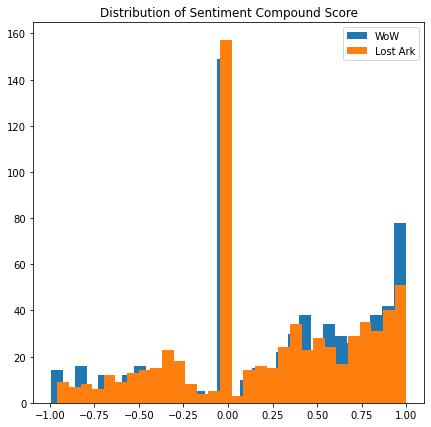

In [97]:
plt.figure(figsize=(7,7))
plt.hist(wow_posts['sentiment_compound'], bins = 30, label = 'WoW')
plt.hist(lostark_posts['sentiment_compound'], bins = 30, label = 'Lost Ark')
plt.title('Distribution of Sentiment Compound Score')
plt.legend(loc = 'upper right');

We can see that a lot of the posts from both subreddits are neutral but its a different story on the positive and negative ends. 

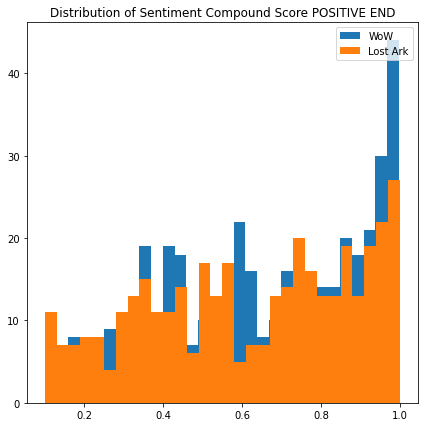

In [98]:
#looking closer at the positive end:
plt.figure(figsize=(7,7))
plt.hist(wow_posts[wow_posts['sentiment_compound'] > 0.1]['sentiment_compound'], bins = 30, label = 'WoW')
plt.hist(lostark_posts[lostark_posts['sentiment_compound'] > 0.1]['sentiment_compound'], bins = 30, label = 'Lost Ark')
plt.title('Distribution of Sentiment Compound Score POSITIVE END')
plt.legend(loc = 'upper right');

Looking at the positive end, we see that the World of Warcraft subreddit has a lot of the highest positive scores for sentimental analysis.

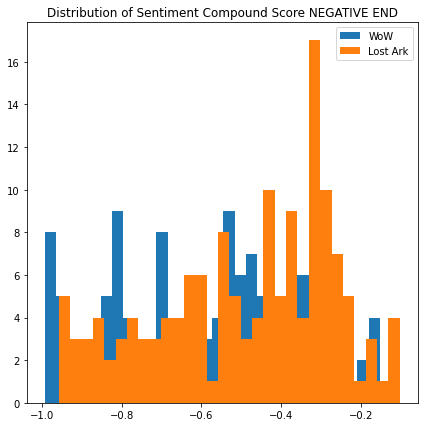

In [99]:
#looking closer at the negative end:
plt.figure(figsize=(7,7))
plt.hist(wow_posts[wow_posts['sentiment_compound'] < -0.1]['sentiment_compound'], bins = 30, label = 'WoW')
plt.hist(lostark_posts[lostark_posts['sentiment_compound'] < -0.1]['sentiment_compound'], bins = 30, label = 'Lost Ark')
plt.title('Distribution of Sentiment Compound Score NEGATIVE END')
plt.legend(loc = 'upper right');

Looking at the negative end, we see that the World of Warcraft subreddit has a lot of highest negative scores for sentimental analysis.

In [100]:
wow_posts['sentiment_class'].value_counts()

positive    417
neutral     150
negative    127
Name: sentiment_class, dtype: int64

In [101]:
lostark_posts['sentiment_class'].value_counts()

positive    381
neutral     160
negative    151
Name: sentiment_class, dtype: int64

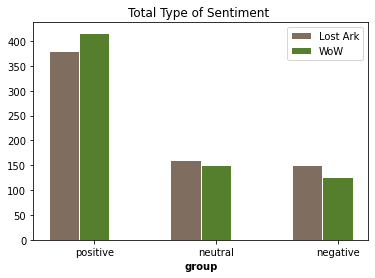

In [102]:
#https://www.python-graph-gallery.com/11-grouped-barplot
# set width of bars
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(lostark_posts['sentiment_class'].value_counts()))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, lostark_posts['sentiment_class'].value_counts(), color='#7f6d5f', width=barWidth, edgecolor='white', label='Lost Ark')
plt.bar(r2, wow_posts['sentiment_class'].value_counts(), color='#557f2d', width=barWidth, edgecolor='white', label='WoW')


# Add xticks on the middle of the group bars
plt.title('Total Type of Sentiment ')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(lostark_posts['sentiment_class'].value_counts().to_list()))], ['positive', 'neutral', 'negative'])



# Create legend & Show graphic
plt.legend()
plt.show()



In [103]:
range(len(lostark_posts['sentiment_class'].value_counts().to_list()))

range(0, 3)

In [104]:
lostark_posts['sentiment_class'].value_counts()

positive    381
neutral     160
negative    151
Name: sentiment_class, dtype: int64

In [105]:
wow_posts['sentiment_class'].value_counts()

positive    417
neutral     150
negative    127
Name: sentiment_class, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title_and_selftext       1386 non-null   object 
 1   title                    1386 non-null   object 
 2   selftext                 1386 non-null   object 
 3   subreddit                1386 non-null   object 
 4   created_utc              1386 non-null   int64  
 5   author                   1386 non-null   object 
 6   num_comments             1386 non-null   int64  
 7   score                    1386 non-null   int64  
 8   is_self                  1386 non-null   bool   
 9   filtered_title_selftext  1386 non-null   object 
 10  subreddit_class          1386 non-null   int64  
 11  sentiment                1386 non-null   object 
 12  sentiment_compound       1386 non-null   float64
 13  sentiment_class          1386 non-null   object 
dtypes: bool(1), float64(1), 

# Modeling

In [ ]:
#After doing the transform on countvectorizer   (REMEMBER YOU TRANSFORMED IT TO GET TI READY FOR MACHINE LEARNING!)
# after fitting then transforming x_train above.. we can plug X_train into all types of machine learning algorithsm!
lreg_s = LogisticRegression(random_state=42)


In [ ]:
lreg_s.fit(X_train, y_train)

In [ ]:
lreg_s.score(X_train, y_train), lreg_s.score(X_test, y_test) 

In [ ]:
from sklearn.model_selection import cross_val_score
#cross validation.. it takes the data that already exists creates its samples from the data we already have and it simulates new data
# its like my accuracy score.. also a reader on how it will react to new data

In [ ]:
cross_val_score(estimator=lreg_s, X = X_train, y =  y_train, cv= 5).mean()

In [ ]:
lreg_s.coef_

In [ ]:
lreg_coef = pd.DataFrame({
    'coef': lreg_s.coef_[0],
    'exp(coef)': np.exp(lreg_s.coef_[0])
}, index=X_train_df.drop(columns='subreddit_class').columns)

In [ ]:
lreg_coef

In [ ]:
lreg_coef.sort_values(by='exp(coef)', ascending=False)[:15]

Having the word 'wow' in a post, the subreddit is 8x likely to be the world of warcraft subreddit then being the lost ark subreddit.

                'blizzard', about 5x likely to be the world of warcraft subreddit then being the lost ark subreddit.

In [ ]:
top_wow_coef = lreg_coef.sort_values(by='exp(coef)', ascending=False)[:15].index.to_list()

In [ ]:
lreg_coef.sort_values(by='exp(coef)', ascending=True)[:15]

Having the word 'ark' in your post, it will be 80% less likely be in the wow subreddit.
Having the word 'platinum' in your post, it will be 56% less likely be in the wow subreddit.

In [ ]:
#https://quantifyinghealth.com/interpret-logistic-regression-coefficients/
# for negative coef its 1 - exp(coef) = some_number%.. Interpretation above!
# if these variables were standardized interpretation would be different. I would say something : "an 1 standard dev increase in x, is some percentage likely tp increase the chance in y  (y would be classification.. which is 1)

In [ ]:
top_lostark_coef = lreg_coef.sort_values(by='exp(coef)', ascending=True)[:15].index.to_list()
top_lostark_coef

In [ ]:
#from my top coef of each subreddit what is the sentiment it belongs in

In [ ]:
for coef in top_wow_coef:
    print(coef)
    print(df.loc[df['filtered_title_selftext'].str.contains(coef)]['sentiment_class'].value_counts())
    print('=========================')

The word 'spec' is associated mostly in positive type of posts

In [ ]:
for coef in top_lostark_coef:
    print(coef)
    print(df.loc[df['filtered_title_selftext'].str.contains(coef)]['sentiment_class'].value_counts())
    print('=========================')

The word 'platinum' is associated mostly in positive comments.

#### Logistic Regression

In [ ]:
X = df['filtered_title_selftext']
y = df['subreddit_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
y.value_counts(normalize=True)

Baseline score is %50

In [ ]:
#Instantiate Countvectorizer
cvec = CountVectorizer(stop_words='english')
  #include the argument stop_words so we dont have to include words that little to no significance  for our analysis

In [ ]:
#fit the vectorizer onto our corpus
cvec.fit(X_train) 

In [ ]:
#transform the corpus
X_train = cvec.transform(X_train)

#transform the test
X_test = cvec.transform(X_test)

In [ ]:
LogisticRegression().get_params()

In [ ]:
#create a dictionary of our Logisitc Regression hyperparameters
lreg_params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 0.1, 0.0001],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [5000, 7000]    #
}

In [ ]:
lreg_gridsearch = GridSearchCV(estimator= LogisticRegression(random_state=42),
                              param_grid=lreg_params,
                              cv = 5,
                              verbose=1)

In [ ]:
lreg_gridsearch.fit(X_train, y_train)


In [ ]:
lreg_gridsearch.best_params_

In [ ]:
lreg_best = lreg_gridsearch.best_estimator_

In [ ]:
lreg_best.score(X_train, y_train)

In [ ]:
print("Best params: ", lreg_gridsearch.best_params_)
print('Best score: ', lreg_gridsearch.best_score_)

print("Train score: ", lreg_best.score(X_train, y_train))
print("Test score: ", lreg_best.score(X_test, y_test))


In [ ]:
from sklearn.model_selection import cross_val_score
#cross validation.. it takes the data that already exists creates its samples from the data we already have and it simulates new data
# its like my accuracy score.. also a reader on how it will react to new data

In [ ]:
cross_val_score(estimator=lreg_s, X = X_train, y =  y_train, cv= 5).mean()

In [ ]:
pd.DataFrame(lreg_gridsearch.cv_results_).sort_values('rank_test_score').head(3)

In [ ]:
lreg_gridsearch.

In [ ]:
lreg_best.coef_

In [ ]:
X_train.shape

### KNN

In [ ]:
KNeighborsClassifier().get_params()

In [ ]:
knn_params = {
    'n_neighbors': range(315,329), #range(330,401, 7) best was 330,#[337, 451, 553, 777],  337 was the best range for this
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [ ]:
knn_gridsearch = GridSearchCV(estimator= KNeighborsClassifier(),
                              param_grid=knn_params,
                              cv = 5,
                              verbose=1)

In [ ]:
knn_gridsearch.fit(X_train, y_train)

In [ ]:
knn_gridsearch.best_params_

In [ ]:
cross_val_score(estimator= KNeighborsClassifier(n_neighbors=330, weights ='distance', metric = 'manhattan'), X = X_train, y =  y_train, cv= 5).mean()

In [ ]:
knn_best = knn_gridsearch.best_estimator_

In [ ]:
print("Best params: ", knn_gridsearch.best_params_)
print('Best score: ', knn_gridsearch.best_score_)

print("Train score: ", knn_best.score(X_train, y_train))
print("Test score: ", knn_best.score(X_test, y_test))


In [ ]:
pd.DataFrame(knn_gridsearch.cv_results_).sort_values('rank_test_score').head(3)

## Decision Trees

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

In [ ]:
dtc.score(X_train, y_train), dtc.score(X_test, y_test)

In [ ]:
DecisionTreeClassifier().get_params()

In [ ]:
dtc_params = {
    'max_depth': [7,8,9,10], #range(3,9) best was 8,
    'min_samples_split': [3,4,5], #range(3,9) best was 3,
    'min_samples_leaf': [2,3], #[2,4,5] best was 2,
    'ccp_alpha' : [0.0001, 0.00023, 0.00034, 0.00005]   # best was 0.001[0.001, 0.1, 1, 10]
}

In [ ]:
dtc_gridsearch = GridSearchCV(
    estimator= DecisionTreeClassifier(random_state=42),
    param_grid= dtc_params,
    cv = 5,
    verbose=1,
    n_jobs = 2
)

In [ ]:
dtc_gridsearch.fit(X_train, y_train)

In [ ]:
dtc_gridsearch.best_params_

In [ ]:
cross_val_score(estimator=DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=10, min_samples_leaf=3, min_samples_split=3), X = X_train, y = y_train, cv= 5).mean()

In [ ]:
dtc_best = dtc_gridsearch.best_estimator_

In [ ]:
print("Best params: ", dtc_gridsearch.best_params_)
print('Best score: ', dtc_gridsearch.best_score_)

print("Train score: ", dtc_best.score(X_train, y_train))
print("Test score: ", dtc_best.score(X_test, y_test))


In [ ]:
pd.DataFrame(dtc_gridsearch.cv_results_).sort_values('rank_test_score').head(3)

In [ ]:
#lets visualize ourr best parameter from Decisiontrees
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(40,40))

plot_tree(dtc_best,
         feature_names= X_train_df.drop(columns='subreddit_class').columns,
         class_names= ['Lost_Ark', 'WoW'],
         filled= True);


### Ensembles: Bagging |  RandomForestClassifier | ExtraTreesClassifier | GradientBoostingClassifier

#### Decision Trees and Bagging

In [ ]:
#use the best parameters from my DecisionTree to input into my Bagging classifer

In [ ]:
#Instantiate BaggingClassifier
bag = BaggingClassifier(base_estimator=dtc_best, n_estimators= 20)

#Fit BaggingClassifier
bag.fit(X_train, y_train)

#Scores of train and test set
print("Train Score: ", bag.score(X_train, y_train))
print("Test Score", bag.score(X_test, y_test))


Bagging, or bootstrap aggregating, does slighlty better then DecisionTrees.  DecisionTrees tend to overfit to their training set because of how deep they try to learn the data so 
Bagging mitigates this problem by exposing different trees to different sub-samples of training set.

#### RandomForestClassifierr

In [ ]:
RandomForestClassifier().get_params()

In [ ]:
rfc_params = {
    'n_estimators': [20,30,50, 75],
    'max_features': ['auto', 'log2', None],
    'max_depth' : [6, 8, 10],
    'min_samples_leaf': [2, 4],
    'ccp_alpha' : [0.01, 0.03]   
}

In [ ]:
rfc_gridsearch = GridSearchCV(estimator= RandomForestClassifier(n_jobs=5), param_grid=rfc_params, cv=5, verbose=1)

In [ ]:
rfc_gridsearch.fit(X_train, y_train)

In [ ]:
rfc_gridsearch.best_params_

In [ ]:
rfc_best = rfc_gridsearch.best_estimator_

In [ ]:
cross_val_score(estimator=RandomForestClassifier(n_estimators= 75, n_jobs=5, ccp_alpha=0.01, max_depth=8, max_features='auto', min_samples_leaf=4 ), X = X_train, y = y_train, cv=5).mean()

In [ ]:
print("Best params: ", rfc_gridsearch.best_params_)
print('Best score: ', rfc_gridsearch.best_score_)

print("Train score: ", rfc_best.score(X_train, y_train))
print("Test score: ", rfc_best.score(X_test, y_test))


#### ExtraTreeClassifier

In [ ]:
ExtraTreesClassifier().get_params()

In [ ]:
etc_params = {
    'n_estimators': [20,30,50, 75],
    'max_features': ['auto', 'log2', None],
    'max_depth' : [6, 8, 10],
    'min_samples_leaf': [2, 4],
    'ccp_alpha' : [0.01, 0.03]   
}

In [ ]:
etc_gridsearch = GridSearchCV(estimator= ExtraTreesClassifier(n_jobs=5), param_grid=etc_params, cv = 5, verbose=1)

In [ ]:
etc_gridsearch.fit(X_train, y_train)

In [ ]:
etc_gridsearch.best_params_

In [ ]:
etc_best = etc_gridsearch.best_estimator_

In [ ]:
cross_val_score(estimator=ExtraTreesClassifier(n_estimators= 30, n_jobs=5, ccp_alpha=0.01, max_depth=10, max_features=None, min_samples_leaf=2), X = X_train, y = y_train, cv=5).mean()

In [ ]:
print("Best params: ", etc_gridsearch.best_params_)
print('Best score: ', etc_gridsearch.best_score_)

print("Train score: ", etc_best.score(X_train, y_train))
print("Test score: ", etc_best.score(X_test, y_test))


### GradientBoostingClassifier

In [ ]:
GradientBoostingClassifier().get_params()

In [ ]:
gbc_params = {
    'n_estimators': [20,30,75],
    'max_features': ['auto', None],
    'max_depth' : [6, 10],
    'min_samples_leaf': [2, 4],
    'ccp_alpha' : [0.01, 0.03],
}


In [ ]:
gbc_gridsearch = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1), param_grid=gbc_params, cv=5, verbose=1)

In [ ]:
gbc_gridsearch.fit(X_train, y_train)

In [ ]:
gbc_gridsearch.best_params_

In [ ]:
cross_val_score(estimator=GradientBoostingClassifier(n_estimators=20, ccp_alpha=0.01, max_depth=6, max_features='auto', min_samples_leaf=2, learning_rate=0.1 ), X = X_train, y = y_train, cv=5).mean()

In [ ]:
gbc_best = gbc_gridsearch.best_estimator_

In [ ]:
print("Best params: ", gbc_gridsearch.best_params_)
print('Best score: ', gbc_gridsearch.best_score_)

print("Train score: ", gbc_best.score(X_train, y_train))
print("Test score: ", gbc_best.score(X_test, y_test))


### Output all my different Machine Learning Models Scores

In [ ]:
print('='*10 + 'LOGISITC REGRESSION' + '='*10)
print("Best params: ", lreg_gridsearch.best_params_)
print('Best score: ', lreg_gridsearch.best_score_)

print("Train score: ", lreg_best.score(X_train, y_train))
print("Test score: ", lreg_best.score(X_test, y_test))

#-------------------------------------------------

print('='*10 + 'K NEAREST NEIGHBOR' + '='*10)
print("Best params: ", knn_gridsearch.best_params_)
print('Best score: ', knn_gridsearch.best_score_)

print("Train score: ", knn_best.score(X_train, y_train))
print("Test score: ", knn_best.score(X_test, y_test))
#-------------------------------------------------

print('='*10 + 'DECISION TREE' + '='*10)
print("Best params: ", dtc_gridsearch.best_params_)
print('Best score: ', dtc_gridsearch.best_score_)

print("Train score: ", dtc_best.score(X_train, y_train))
print("Test score: ", dtc_best.score(X_test, y_test))
#-------------------------------------------------

print('='*10 + 'BAGGING' + '='*10)

print("Train score: ", bag.score(X_train, y_train))
print("Test score: ", bag.score(X_test, y_test))
#-------------------------------------------------

print('='*10 + 'RANDOM FOREST CLASSIFIER' + '='*10)
print("Best params: ", rfc_gridsearch.best_params_)
print('Best score: ', rfc_gridsearch.best_score_)

print("Train score: ", rfc_best.score(X_train, y_train))
print("Test score: ", rfc_best.score(X_test, y_test))

#-------------------------------------------------

print('='*10 + 'EXTRA TREE CLASSIFIER' + '='*10)
print("Best params: ", etc_gridsearch.best_params_)
print('Best score: ', etc_gridsearch.best_score_)

print("Train score: ", etc_best.score(X_train, y_train))
print("Test score: ", etc_best.score(X_test, y_test))
#-------------------------------------------------

print('='*10 + 'GRADIENT BOOSTING CLASSIFIER' + '='*10)
print("Best params: ", gbc_gridsearch.best_params_)
print('Best score: ', gbc_gridsearch.best_score_)

print("Train score: ", gbc_best.score(X_train, y_train))
print("Test score: ", gbc_best.score(X_test, y_test))



**Out of all our modles, LogisticRegression gave the best training and testing score!**

In [ ]:
#lreg model is a linear model.. uses a link ftn.. performed best bec probably their are small numbers of predictors that are relevant to predicintg the outcome.. if there A LOT OF IMPORTANT features it will be harder
# its saying we have a lot of features that are redundant

#tree base better for complex features that are interacting with one another!  those interactions arent linear so lreg would be bad!


#hias bias model useful in a dataset that is very noisy

#### Can we make the score better from our top ML model?

In [ ]:
## Lets try tranforming on our data again using TF_IDF Vectorizer!

In [ ]:
df

In [ ]:
# Redefine training and testing sets.
X_trainv, X_testv, y_trainv, y_testv = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
lreg_best

In [ ]:
TfidfVectorizer().get_params()

In [ ]:
pipe_tvec = Pipeline([
    ("tvec", TfidfVectorizer(stop_words='english')),
    ("lreg", LogisticRegression(C = 1, max_iter= 5000, random_state=42, solver='saga'))
    #('mnb', MultinomialNB())
])


In [ ]:
pipe_tvec_params = {
    'tvec__max_features': [2000,3000,4000,5000],  #4000 has been the best
    'tvec__ngram_range':[(1,1), (1,2), (2,2)],  #(1,2) has vbeen the best
    'tvec__min_df': [2,3],   #2 has been the best
    'tvec__max_df': [0.91, 0.95, 0.98],
    'tvec__norm': ['l1', 'l2']
}


In [ ]:
gs_tvec = GridSearchCV(estimator=pipe_tvec,
                      param_grid= pipe_tvec_params,
                      cv = 5,
                      verbose=1)

In [ ]:
# Fit GridSearch to training data.
gs_tvec.fit(X_trainv, y_trainv)

In [ ]:
gs_tvec.best_params_

In [ ]:
tvec_best = gs_tvec.best_estimator_

In [ ]:
#comparing countvectorizer to tfidv-vectorizer
print('='*10 + 'LOGISITC REGRESSION' + '='*10)
print("Best params: ", lreg_gridsearch.best_params_)
print('Best score: ', lreg_gridsearch.best_score_)

print("Train score: ", lreg_best.score(X_train, y_train))
print("Test score: ", lreg_best.score(X_test, y_test))


print('='*10 + 'LOGISITC REGRESSION & TFIDF-VECTORIZER' + '='*10)
print("Best params: ", gs_tvec.best_params_)
print('Best score: ', gs_tvec.best_score_)

print("Train score: ", tvec_best.score(X_trainv, y_trainv))
print("Test score: ", tvec_best.score(X_testv, y_testv))


**Logisitc Regression being transformed by TfidfVectorizer does slighlty better then CountVectorized.  We see our test score does 1% better in Tfidf due to a bias-varriance tradeoff.**

In [ ]:
X_trainv

In [ ]:
## REMINDER: 1 REPRESENTS 'wow subreddit' ........... 0 REPRESENTS 'lost ark subreddit'

In [ ]:
#get predictions!

preds_tvec = gs_tvec.predict(X_testv)

#save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds_tvec).ravel()

#calculate specificty
spec = tn / (tn + fp)
print(f"Specificity: {spec}")

**Specificty Interpretation: My model predicted that a post belongs in the Lost Ark (0) subreddit about 77% of the time.**

In [ ]:
107 / (107+32)

In [ ]:
prec

In [ ]:
#CALCULATE PRECISION

In [ ]:
prec = tp / (tp + fp)
print(f"Precision: {prec}")

**Precision Interpretations: When my model predicted a post belongs in the WoW(1) subreddit, about 80% was correctly classified.**

In [ ]:
#Calculate Sensitivity
sens = tp / (tp + fn)
print(f"Sensitivity: {sens}")

**Sensitivity Interpretation: Among the posts that are classified as 'wow', 89% of them are correct.**

In [ ]:
#CALCULATE ACCURACY
acc = (tp + tn)/ (tp+fp+tn+fn)   #all corect/ all predictions
print(f"Accuracy: {acc}")

**Accuracy Interpreation: My model is accurate of classifying posts 83% of the time. It will misclassify posts 17% of the time.**

In [ ]:
#visualize this by plotting confusion matrix
plot_confusion_matrix(gs_tvec, X_testv, y_test, cmap='Blues', values_format='d')